In [1]:
import pandas as pd
import numpy as np

sales=pd.read_csv('09-19-Amazon-Ranking-Analysis.csv')  # Load Data set

In [2]:
sales.head()   # BB = Amazon Buy Box

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [3]:
#Since all data was collected over a three month period,
# and for each product all vendors and information were scraped on the same day,
# remove the date column since it is not expected to have an effect on the analysis
sales.drop(['Index','ScrapeDate'], axis=1, inplace=True)  

sales.rename(columns={'ProductName':'Product'}, inplace=True) #Rename column for ease of use

# Convert column types to string format - required for string analysis later
sales['BBVendor']=sales['BBVendor'].astype('str')
sales['ScrapedIndexVendor']=sales['ScrapedIndexVendor'].astype('str')

In [4]:
#Add columns of important differentials which may contribute to whether or not a vendor wins the BuyBox

# Create column of price differential between BuyBox seller price and the CorrectedPrice from all vendors
sales['BBPriceDif']=sales['BBCorrectedPrice']-sales['CorrectedPrice']

# Create column of differential between ScrapedIndex and the CorrectedTrueIndexRank
sales['IndexDif']=sales['ScrapedIndex']-sales['CorrectedIndexTrueRank']

In [5]:
sales.head()  # inspect new columns

,Product,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,BBPriceDif,IndexDif
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,4.03,1
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,0.00,-1
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,6.01,0
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,6.01,1
4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,6.01,2


In [6]:
sales.dtypes , sales.nunique() #inspect data types and number of unique values

(Product                    object
 ScrapedIndex                int64
 ScrapedIndexTrueRank        int64
 CorrectedIndexTrueRank      int64
 ScrapedIndexPrice         float64
 CorrectedPrice            float64
 ScrapedIndexVendor         object
 ScrapedIndexVendorType     object
 BBScrapedPrice            float64
 BBVendorType               object
 BBVendor                   object
 BBCorrectedPrice          float64
 BBPriceDif                float64
 IndexDif                    int64
 dtype: object,
 Product                    250
 ScrapedIndex               154
 ScrapedIndexTrueRank       113
 CorrectedIndexTrueRank     107
 ScrapedIndexPrice         3885
 CorrectedPrice            4028
 ScrapedIndexVendor        2892
 ScrapedIndexVendorType       3
 BBScrapedPrice             198
 BBVendorType                 3
 BBVendor                    63
 BBCorrectedPrice           231
 BBPriceDif                4590
 IndexDif                   129
 dtype: int64)

In [7]:
# Group the products by product and check the correlation between the two columns of interest
grp=sales.groupby('Product')[['ScrapedIndexTrueRank','CorrectedIndexTrueRank']].corr()[['CorrectedIndexTrueRank']].reset_index()
grp

,Product,level_1,CorrectedIndexTrueRank
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,ScrapedIndexTrueRank,-1.000000
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,CorrectedIndexTrueRank,1.000000
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",ScrapedIndexTrueRank,0.778677
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",CorrectedIndexTrueRank,1.000000
4,2wayz FULL METAL BODY Garden Hose Splitter | Y...,ScrapedIndexTrueRank,1.000000
...,...,...,...
495,Zymox Otic Pet Ear Treatment with Hydrocortisone,CorrectedIndexTrueRank,1.000000
496,"iPhone 6S Screen Protector, Maxboost Tempered ...",ScrapedIndexTrueRank,-1.000000
497,"iPhone 6S Screen Protector, Maxboost Tempered ...",CorrectedIndexTrueRank,1.000000
498,myBaby SoundSpa Portable,ScrapedIndexTrueRank,0.894505


In [8]:
# use groupby again to take the average correlation value between CorrectedTrueRank and ScrapedIndexTrueRank
grp.groupby('level_1').mean()  

,CorrectedIndexTrueRank
level_1,
CorrectedIndexTrueRank,1.00000
ScrapedIndexTrueRank,0.82783


Answer: On average the R^2 value is .827, so there is strong positive correlation between the Scraped True Ranking and the Corrected Ranking, but in the ideal case the R^2 would be 1.

In [9]:
# First, create a binaray column to describe if a listing has been manipulated
# Manipulated is defined as a vendor offering the item at a lower price than the BuyBox, and hence they should have won the Buy Box
sales['Manipulated']=(sales['CorrectedPrice']<sales['BBCorrectedPrice'])

# Group the data by product and display the average of 'CorrectedPrice' and 'Manipulated' columns for each product
manip_grp = sales.groupby('Product')[['CorrectedPrice', 'Manipulated']].mean()

# convert the 'Manipulated' column to boolean True/False - it will be true if the value is >0
manip_grp['Manipulated']=(manip_grp['Manipulated']>0) 


In [10]:
# group by the 'Manipulated' column and display the average CorrectedPrice among products that were manipulated or not
manip_grp.groupby('Manipulated')[['CorrectedPrice']].mean()

,CorrectedPrice
Manipulated,
False,72.084928
True,56.740686


In [11]:
# also inspect the number of items manipulated
manip_grp.groupby('Manipulated')[['CorrectedPrice']].count()

,CorrectedPrice
Manipulated,
False,62
True,188


In [12]:
188/(62+188)  #Calculate the percent of manipulated listings

0.752

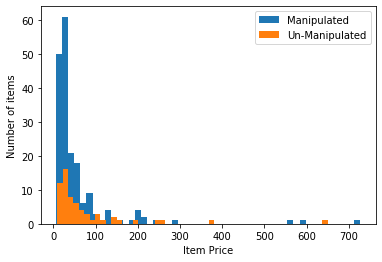

In [13]:
#split data into two groups for easier plot entry
manipulated=manip_grp[manip_grp['Manipulated']]
unmanipulated=manip_grp[~manip_grp['Manipulated']]

# Plot histogram
from matplotlib import pyplot
pyplot.hist(manipulated['CorrectedPrice'], 50, label='Manipulated')  # 50 bins
pyplot.hist(unmanipulated['CorrectedPrice'], 50, label='Un-Manipulated')  #50 bins
pyplot.legend(loc='upper right')
pyplot.xlabel('Item Price')
pyplot.ylabel('Number of items')
pyplot.show()

Question: Predict whether or not a vendor will be in the buybox

In [14]:
# First, create a column to describe if a certain vendor is in the Buy Box
# At first, there are two obvious ways one might check this:

In [15]:
# The first way to check if a vendor is in the buybox is to check if the vendor name from ScrapedIndexVendor appears in BBVendor
for idx, row in sales.iterrows():   #iterate through rows, returns a series for each row
    sales.loc[idx,'IsBuyBox']=(row['ScrapedIndexVendor'] in row['BBVendor'])*(row['BBCorrectedPrice']==row['CorrectedPrice'])

sales['IsBuyBox'].sum()   #Check that the total sum is 250, corresponding to the number of products

224.0

In [16]:
sales.groupby('Product')[['IsBuyBox']].sum()['IsBuyBox'].value_counts()
# This reaveals that my method of imputing 'IsBuyBox' is not perfect
# but it is enough accurate data that modeling with this dataset still produces a strong fit and accurate results.

1.0    220
0.0     28
2.0      2
Name: IsBuyBox, dtype: int64

In [17]:
# In fact, the sum is less than 250 which means that a few products do not have assigned buybox winners
# Since the number of missing winners is small, its impact on the model should be minimal.
# Ideally if time permitted I would impute these values by making a nested loop to iterate through each product
# and select a winner for the BuyBox.
# I explored this and determined that the iteration required is more complicated
# than it appears on the surface and I did not have enough time to solve this accurately, so I removed this attempted code for cleanliness.


In [18]:
#Initialize data preparation, modeling, and optimization tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#create instances of modeling tools to use
rfc   = RandomForestClassifier()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=10)

# create instance of encoder and scaler
ohe = OneHotEncoder()
sc = StandardScaler()

## Drop columns from X dataset:
# IsBuyBox - this is the column that we will predict
# Product - this is the product name.  The name does not affect the outcome
# Remove these columns from X dataset because they are fully correlated to IsBuyBox and get populated after BB is selected
# BBScrapedPrice
# BBVendorType
# BBVendor 
# BBCorrectedPrice  

X=sales.drop(['IsBuyBox', 'Product', 'BBScrapedPrice','BBVendorType', 'BBVendor', 'BBCorrectedPrice'], axis=1)
y=sales['IsBuyBox']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)


In [19]:
# Since we are predicting a binary category, it is best to use random forest classifier modeling rather than linear modeling
pipe = make_pipeline(ohe, rfc)  #one-hot-encode categorical columns
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['ScrapedIndexVendor',
                                     'ScrapedIndexVendorType'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weig

In [20]:
# Cross-validate the model of the training set with 10 folds

from sklearn.model_selection import cross_val_score
cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=15)

# The R^2 values are high (close to 1), so the model is a very good fit.  
# 5 and 15 folds were also tested with similar results.

array([0.99462366, 0.98924731, 0.99462366, 0.99193548, 0.98655914,
       0.98924731, 0.98924731, 0.98655914, 0.98387097, 0.99731183,
       0.98924731, 0.98655914, 1.        , 0.99191375, 0.98921833])

In [21]:
# Check the score on the test data.  The resulting R^2 value is high meaning it is a good model
pipe.score(X_test,y_test)

0.9956989247311828

In [22]:
# inspect the feature importances - how much each column (feature) contributes to the overall prediction value

importances=pipe.steps[1][1].feature_importances_  #Exctract feature importances from RF step in pipeline
columns=pipe.steps[0][1].get_feature_names()   #Exctract feature names from hot encoder step in pipeline

# Create dataframe of feature importances for easier viewing
features = pd.DataFrame({
    'Column': columns,
    'Importance': importances,
}).sort_values(by='Importance', ascending=False)

#display most important columns which contribute to the overall prediction value.
features.head(15)

,Column,Importance
94,ScrapedIndexVendor_90,0.172634
2507,ScrapedIndexVendorType_3,0.163059
2508,BBPriceDif,0.104278
0,ScrapedIndex,0.072365
1,ScrapedIndexTrueRank,0.072271
2505,ScrapedIndexVendorType_1,0.057463
2510,Manipulated,0.056606
3,ScrapedIndexPrice,0.047613
4,CorrectedPrice,0.044245
2509,IndexDif,0.038581


In [23]:
# Pickle the pipeline
import pickle
with open ('Michael_Lawlor_rfc_pipe.pkl', 'wb') as pipe_var:   # create a file called Micha....pk., --write, bytecode (0's and 1's).  
                                                                # file's variable name is pipe_var
    pickle.dump(pipe, pipe_var) #Save pipeline to file

# save test data to CSV file
X_test.to_csv (r'X_test.csv', index = False, header=True)
y_test.to_csv (r'y_test.csv', index = False, header=True)

Although in the case of estimating binary categorical data it is best to use Random Forest Categorical Modeling, I will further explore how good of a fit can a linear model (with some rounding at the end) achieve?

In [24]:
#First, convert y_values from boolean to integer
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [25]:
# Create a pipeline with one-hot-encoding, standard scaling, and ridge regression
ridge_pipe = make_pipeline(ohe, sc, ridge)

#fit the training data
ridge_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['ScrapedIndexVendor',
                                     'ScrapedIndexVendorType'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [26]:
#score the training data.  The fit is OK
ridge_pipe.score(X_train,y_train) 

0.8314557150547279

In [27]:
#Predict th values of y for the training data using the model
train_predict=ridge_pipe.predict(X_train).round().astype(int)
train_predict.sum()  #check that the total # of buybox winners is accurate.  
                     #The train/test split is 80% so this is in the right ballpark.

197

In [28]:
# Use grid search to find best value of alpha

# Create params dictionary with all values of alpha to test
params = {
    'ridge__alpha': [.001,.01,.1, 1, 10, 100] 
}

# Initialize grid search
grid=GridSearchCV(estimator=ridge_pipe, param_grid=params, cv=5)

In [29]:
# Fit the training data to the grid
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('onehotencoder',
                                        OneHotEncoder(cols=['ScrapedIndexVendor',
                                                            'ScrapedIndexVendorType'],
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=False,
                                                      verbose=0)),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                      

In [30]:
grid.best_params_  # a 100 alpha provides the best fit

{'ridge__alpha': 100}

In [31]:
grid.score(X_train, y_train) # grid score according to alpha=100

0.8310428949423778